In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')
df.info()


<ipython-input-2-451a4d7dd212>:2: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [ ]:
df['loan_status'].value_counts(dropna=False)

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
NaN                                                          1
Name: loan_status, dtype: int64

In [ ]:
# All Categorical Features

categorical_feature = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_feature)

['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'debt_settlement_flag']


**Remove features with more than 50% missing values**

In [ ]:
# Calculate missing value percentages
missing_percentages = df.isnull().mean() * 100

for column, missing_percentage in missing_percentages.items():
    print(f"{column} --> {df[column].isnull().sum()} missing values ({missing_percentage:.2f}%)")

# Identify columns with more than 50% missing values
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()

# Remove columns with more than 50% missing values
df = df.drop(columns=columns_to_drop)

# Display the filtered DataFrame
print("\n\nDataFrame after removing columns with more than 50% missing values:")
print(df.head())

Unnamed: 0 --> 0 missing values (0.00%)
id --> 0 missing values (0.00%)
loan_amnt --> 1 missing values (0.00%)
funded_amnt --> 1 missing values (0.00%)
funded_amnt_inv --> 1 missing values (0.00%)
term --> 1 missing values (0.00%)
int_rate --> 1 missing values (0.00%)
installment --> 1 missing values (0.00%)
grade --> 1 missing values (0.00%)
sub_grade --> 1 missing values (0.00%)
emp_title --> 264087 missing values (9.03%)
emp_length --> 205221 missing values (7.01%)
home_ownership --> 1 missing values (0.00%)
annual_inc --> 5 missing values (0.00%)
verification_status --> 1 missing values (0.00%)
issue_d --> 1 missing values (0.00%)
loan_status --> 1 missing values (0.00%)
pymnt_plan --> 1 missing values (0.00%)
url --> 1 missing values (0.00%)
purpose --> 1 missing values (0.00%)
title --> 23326 missing values (0.80%)
zip_code --> 2 missing values (0.00%)
addr_state --> 1 missing values (0.00%)
dti --> 3109 missing values (0.11%)
delinq_2yrs --> 30 missing values (0.00%)
earliest_cr

In [ ]:
pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 818.1 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from skfeature.function.similarity_based import fisher_score
import numpy as np
import pandas as pd

X = df.drop(columns=['loan_status'])
y = df['loan_status']


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X.drop('id', axis=1, inplace=True)
X.drop('Unnamed: 0', axis=1, inplace=True)
X.drop('url', axis=1, inplace=True)
X.drop('zip_code', axis=1, inplace=True)
X.drop('addr_state', axis=1, inplace=True)
X.drop('emp_title', axis=1, inplace=True)
X.drop('title', axis=1, inplace=True)

X['term'].fillna('', inplace=True)


def extract_numeric(term):
    if isinstance(term, str):
        term = term.strip()
        if term.endswith(' months'):
            term = term[:-len(' months')]
        numeric_part = ''.join(filter(str.isdigit, term))
        if numeric_part:
            return int(numeric_part)
    return None


X['term'] = X['term'].apply(extract_numeric)

def remove_percentage(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1])
    else:
        return None


X['revol_util'] = X['revol_util'].apply(remove_percentage)
X['int_rate'] = X['int_rate'].apply(remove_percentage)



date_format = '%b-%Y'  # Example format: Month ( Jan) - Year ( 2015)

# Convert date features to datetime format
X['last_credit_pull_d'] = pd.to_datetime(X['last_credit_pull_d'], format=date_format)
X['last_pymnt_d'] = pd.to_datetime(X['last_pymnt_d'], format=date_format)
X['issue_d'] = pd.to_datetime(X['issue_d'], format=date_format)
X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], format=date_format)


emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    ' ': 0
}

# Apply the mapping to convert emp_length to numerical values
X['emp_length'] = X['emp_length'].map(emp_length_mapping)



ordinal_features = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'application_type', 'hardship_flag','debt_settlement_flag']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to ordinal categorical features
for feature in ordinal_features:
    X[feature] = label_encoder.fit_transform(X[feature])




# Function to convert non-datetime features to integer
def convert_to_integer(value):
    try:
        return int(value)  # Try converting to integer directly
    except (ValueError, TypeError):
        return None  # Return None for non-convertible values

# Identify datetime columns (timestamp columns)
datetime_columns = [col for col in X.columns if pd.api.types.is_datetime64_any_dtype(X[col])]

# Apply conversion function to non-datetime columns
for column in X.columns:
    if column not in datetime_columns:
        X[column] = X[column].apply(convert_to_integer)

# Use LabelEncoder for categorical features (e.g., feature2)
label_encoder = LabelEncoder()
for column in X.columns:
    if column not in datetime_columns and X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])




datetime_columns = ['last_credit_pull_d', 'last_pymnt_d', 'issue_d', 'earliest_cr_line']

reference_date = pd.Timestamp('2024-04-22')

for col in datetime_columns:
    X[col] = (reference_date - X[col]).dt.days
X.fillna(X.mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 12.0 MB/s eta 0:00:00


In [ ]:
pip install xgboost

In [ ]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N


Chi-Square

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# Ensure X is a DataFrame and y is a Series
X = pd.DataFrame(X)
y = pd.Series(y)

chi2_scores, p_values = chi2(X, y)

# Choose a threshold for feature selection
threshold_percentile = 50
threshold_value = np.percentile(chi2_scores, threshold_percentile)

# Select significant features based on the threshold
significant_features_indices = chi2_scores > threshold_value
significant_features = X.columns[significant_features_indices]

# Check if any features were selected
if len(significant_features) > 0:
    print("Significant Features:", significant_features)
else:
    print("No significant features found based on the chosen threshold.")

No significant features found based on the chosen threshold.


## **Information Gain**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Compute mutual information between each feature and the target variable
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their corresponding importance values
feature_importance = pd.DataFrame(data={'Feature': X.columns, 'Importance': mi_scores})

# Sort the features based on their importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


<ipython-input-10-1d329b152347>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


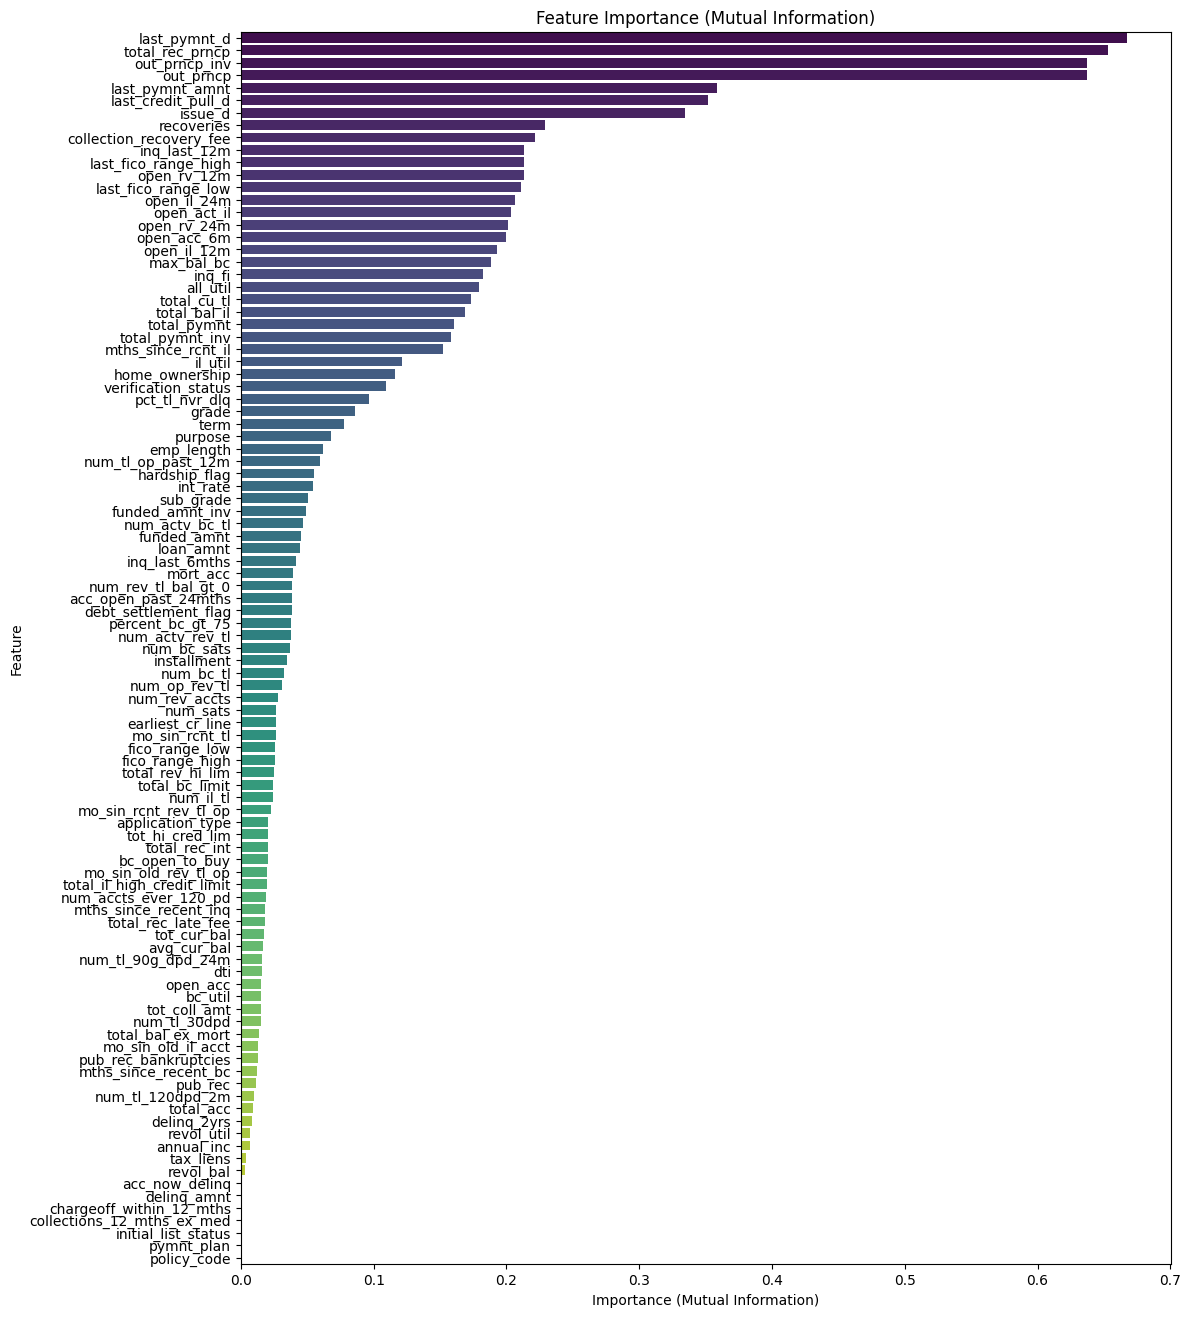

In [ ]:
# Plot the feature importance
plt.figure(figsize=(12, 16))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Importance (Mutual Information)')
plt.ylabel('Feature')
plt.title('Feature Importance (Mutual Information)')
plt.show()


In [ ]:
print("Feature Importance (Mutual Information):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")


Feature Importance (Mutual Information):
Feature: last_pymnt_d, Importance: 0.6671031996936891
Feature: total_rec_prncp, Importance: 0.6529503074035574
Feature: out_prncp_inv, Importance: 0.6373695551022658
Feature: out_prncp, Importance: 0.6370228670958089
Feature: last_pymnt_amnt, Importance: 0.35846031252690547
Feature: last_credit_pull_d, Importance: 0.3514751612631757
Feature: issue_d, Importance: 0.3341837503956573
Feature: recoveries, Importance: 0.229058824573799
Feature: collection_recovery_fee, Importance: 0.22180620888850866
Feature: inq_last_12m, Importance: 0.213365385969001
Feature: last_fico_range_high, Importance: 0.2129818596180506
Feature: open_rv_12m, Importance: 0.21289047229307023
Feature: last_fico_range_low, Importance: 0.21109931000804938
Feature: open_il_24m, Importance: 0.20681406857982454
Feature: open_act_il, Importance: 0.2031509513693317
Feature: open_rv_24m, Importance: 0.20087374506422195
Feature: open_acc_6m, Importance: 0.19956771516709115
Feature: ope

In [ ]:
# Filter features with importance more than 0.1
selected_features = feature_importance[feature_importance['Importance'] > 0.1]['Feature']

# Subset the feature matrix with selected features
X = X[selected_features]

# Split the data into train and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **All Model**

XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)


# Results for XGBoost
print("Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Classification Report:\n{report_xgb}\n")


Model: XGBoost
Accuracy: 0.9879
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     72588
           1       0.99      0.99      0.99    206215
           2       0.90      0.30      0.45        89
           3       0.60      0.37      0.46       148
           4       0.56      0.22      0.31       376
           5       0.99      1.00      0.99    299596
           6       0.54      0.32      0.40      1943
           7       0.93      0.94      0.94       377
           8       0.26      0.02      0.03       530
           9       0.87      0.76      0.81      3237

    accuracy                           0.99    585099
   macro avg       0.76      0.59      0.64    585099
weighted avg       0.99      0.99      0.99    585099




In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

sorted_indices = np.argsort(y_prob_xgb)[::-1]
y_test_sorted = y_test.iloc[sorted_indices]
y_prob_sorted = y_prob_xgb[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate precision, recall (sensitivity), and specificity
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Calculate H-Measure
h_measure_xgb = 2 * precision_xgb * recall_xgb / (precision_xgb + recall_xgb)
print("H-Measure:", h_measure_xgb)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate sensitivity (true positive rate)
sensitivity_xgb = recall_xgb
print("Sensitivity (TPR):", sensitivity_xgb)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_xgb = tn / (tn + fp)
print("Specificity (TNR):", specificity_xgb)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_xgb = np.sqrt(sensitivity_xgb * specificity_xgb)
print("G-mean:", g_mean_xgb)


Accuracy: 0.9879046110145463
Estimated Gini Index: 0.16608733731060643
H-Measure: 0.987142900695226
Sensitivity (TPR): 0.9879046110145463
Specificity (TNR): 0.9855210227585827
G-mean: 0.9867120971362292


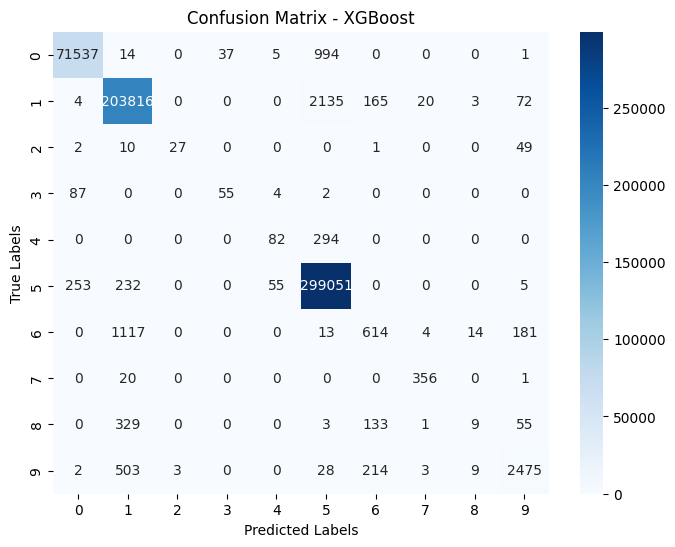

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Accuracy:", accuracy)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

sorted_indices = np.argsort(y_prob_rf)[::-1]
y_test_sorted = y_test.iloc[sorted_indices]
y_prob_sorted = y_prob_rf[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate precision, recall (sensitivity), and specificity
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calculate H-Measure
h_measure_rf = 2 * precision_rf * recall_rf / (precision_rf + recall_rf)
print("H-Measure:", h_measure_rf)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity (true positive rate)
sensitivity_rf = recall_rf
print("Sensitivity (TPR):", sensitivity_rf)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_rf = tn / (tn + fp)
print("Specificity (TNR):", specificity_rf)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_rf = np.sqrt(sensitivity_rf * specificity_rf)
print("G-mean:", g_mean_rf)

Accuracy: 0.9858946947439664
Estimated Gini Index: 0.22421693155924372
H-Measure: 0.9850513989142271
Sensitivity (TPR): 0.9858946947439664
Specificity (TNR): 0.9712349148619607
G-mean: 0.9785373523338365


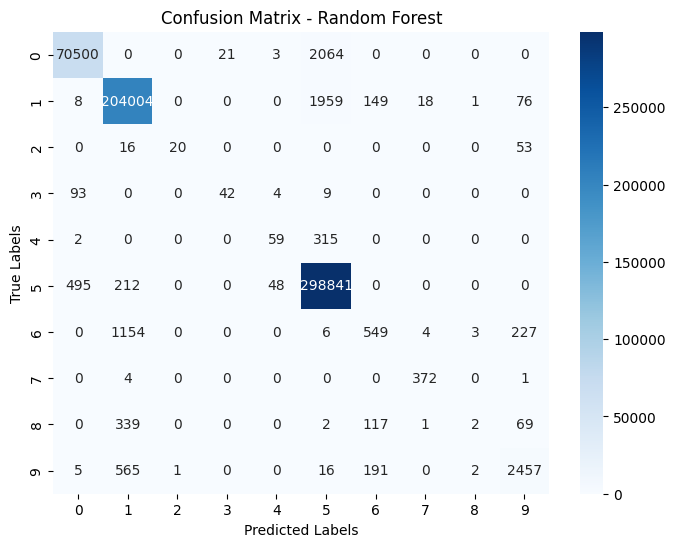

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1. Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 2. Generate Predictions
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
y_pred_lr = lr_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate sensitivity (True Positive Rate)
tp_lr = conf_matrix_lr[1, 1]  # True positives
fn_lr = conf_matrix_lr[1, 0]  # False negatives
sensitivity_lr = tp_lr / (tp_lr + fn_lr)

# Calculate specificity (True Negative Rate)
tn_lr = conf_matrix_lr[0, 0]  # True negatives
fp_lr = conf_matrix_lr[0, 1]  # False positives
specificity_lr = tn_lr / (tn_lr + fp_lr)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_lr = (sensitivity_lr * specificity_lr) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_lr = tp_lr / (tp_lr + fp_lr)
recall_lr = tp_lr / (tp_lr + fn_lr)
h_measure_lr = 2 * precision_lr * recall_lr / (precision_lr + recall_lr)


# 4. Print Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Sensitivity (TPR): {sensitivity_lr:.4f}")
print(f"Specificity (TNR): {specificity_lr:.4f}")
print(f"G-mean: {g_mean_lr:.4f}")
print(f"H-measure: {h_measure_lr:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9690
Sensitivity (TPR): 0.9995
Specificity (TNR): 0.9995
G-mean: 0.9995
H-measure: 0.9997
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94     72588
           1       0.97      0.99      0.98    206215
           2       0.00      0.00      0.00        89
           3       0.39      0.13      0.19       148
           4       0.33      0.20      0.25       376
           5       0.97      0.99      0.98    299596
           6       0.00      0.00      0.00      1943
           7       0.97      0.59      0.73       377
           8       0.00      0.00      0.00       530
           9       0.84      0.12      0.20      3237

    accuracy                           0.97    585099
   macro avg       0.54      0.39      0.43    585099
weighted avg       0.96      0.97      0.96    585099



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


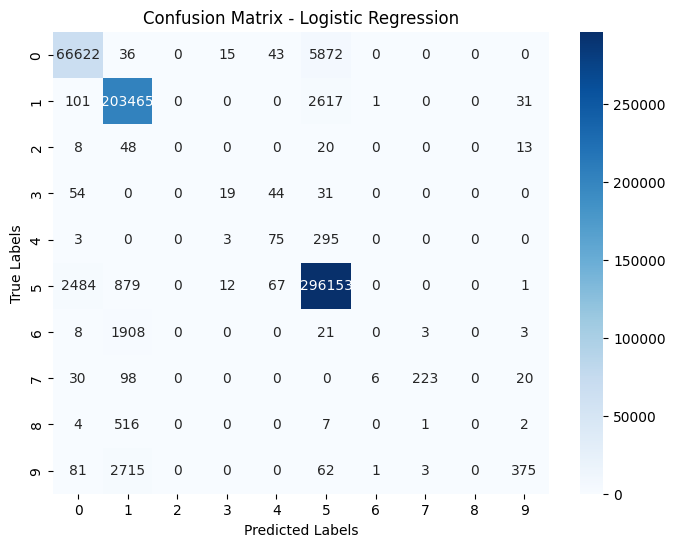

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Naive Bayes Model (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_nb = nb_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate sensitivity (True Positive Rate)
tp_nb = conf_matrix_nb[1, 1]  # True positives
fn_nb = conf_matrix_nb[1, 0]  # False negatives
sensitivity_nb = tp_nb / (tp_nb + fn_nb)

# Calculate specificity (True Negative Rate)
tn_nb = conf_matrix_nb[0, 0]  # True negatives
fp_nb = conf_matrix_nb[0, 1]  # False positives
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_nb = (sensitivity_nb * specificity_nb) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_nb = tp_nb / (tp_nb + fp_nb)
recall_nb = tp_nb / (tp_nb + fn_nb)
h_measure_nb = 2 * precision_nb * recall_nb / (precision_nb + recall_nb)

# 4. Print Metrics
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Sensitivity (TPR): {sensitivity_nb:.4f}")
print(f"Specificity (TNR): {specificity_nb:.4f}")
print(f"G-mean: {g_mean_nb:.4f}")
print(f"H-measure: {h_measure_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Metrics:
Accuracy: 0.6544
Sensitivity (TPR): 1.0000
Specificity (TNR): 0.9998
G-mean: 0.9999
H-measure: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.42      0.59     72588
           1       0.98      0.92      0.95    206215
           2       0.01      0.21      0.02        89
           3       0.00      0.74      0.01       148
           4       0.00      1.00      0.01       376
           5       0.93      0.53      0.68    299596
           6       0.02      0.05      0.03      1943
           7       0.09      0.99      0.16       377
           8       0.00      0.00      0.00       530
           9       0.25      0.63      0.35      3237

    accuracy                           0.65    585099
   macro avg       0.33      0.55      0.28    585099
weighted avg       0.94      0.65      0.76    585099



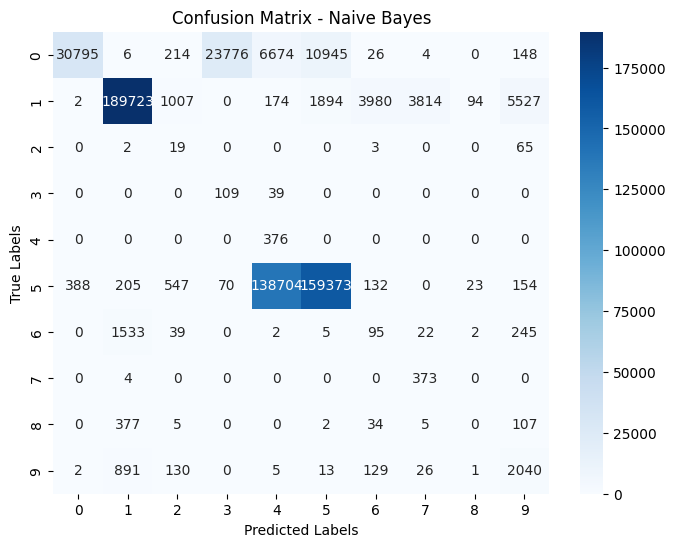

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_dt = dt_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_dt[1, 1]  # True positives
fn_dt = conf_matrix_dt[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_dt[0, 0]  # True negatives
fp_dt = conf_matrix_dt[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# 4. Print Metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.9777
Sensitivity (TPR): 0.9999
Specificity (TNR): 0.9997
G-mean: 0.9998
H-measure: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     72588
           1       0.98      0.98      0.98    206215
           2       0.34      0.35      0.34        89
           3       0.32      0.36      0.34       148
           4       0.21      0.25      0.23       376
           5       0.99      0.99      0.99    299596
           6       0.19      0.24      0.21      1943
           7       0.93      0.92      0.92       377
           8       0.06      0.08      0.07       530
           9       0.72      0.73      0.73      3237

    accuracy                           0.98    585099
   macro avg       0.57      0.59      0.58    585099
weighted avg       0.98      0.98      0.98    585099



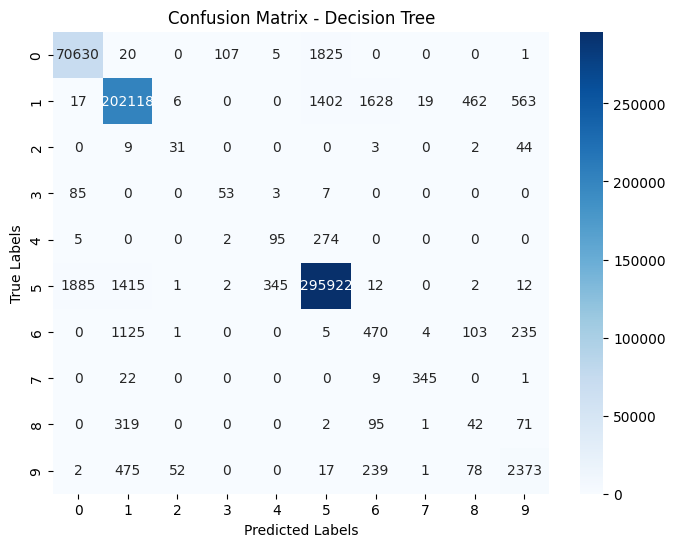

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the CatBoost model with default hyperparameters
catboost_model = CatBoostClassifier()

# Fit CatBoost to the training data
catboost_model.fit(X_train, y_train)

# Generate predictions
y_pred_catboost = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_catboost)
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Calculate Gini index
gini_index = 2 * (accuracy * (1 - accuracy))

# Print evaluation metrics
print("CatBoost Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")
print(f"Gini Index: {gini_index:.4f}")

Learning rate set to 0.117532
0:	learn: 1.3825225	total: 1.17s	remaining: 19m 33s
1:	learn: 1.0867978	total: 2.13s	remaining: 17m 43s
2:	learn: 0.8952384	total: 3.09s	remaining: 17m 6s
3:	learn: 0.7558109	total: 4.06s	remaining: 16m 51s
4:	learn: 0.6490856	total: 5.01s	remaining: 16m 36s
5:	learn: 0.5648501	total: 5.96s	remaining: 16m 26s
6:	learn: 0.4965652	total: 6.89s	remaining: 16m 17s
7:	learn: 0.4403510	total: 7.82s	remaining: 16m 10s
8:	learn: 0.3922847	total: 8.77s	remaining: 16m 5s
9:	learn: 0.3517633	total: 9.73s	remaining: 16m 3s
10:	learn: 0.3170850	total: 10.7s	remaining: 16m
11:	learn: 0.2877994	total: 11.6s	remaining: 15m 56s
12:	learn: 0.2621673	total: 12.5s	remaining: 15m 51s
13:	learn: 0.2404450	total: 13.4s	remaining: 15m 46s
14:	learn: 0.2209522	total: 14.4s	remaining: 15m 43s
15:	learn: 0.2042027	total: 15.3s	remaining: 15m 39s
16:	learn: 0.1898177	total: 16.2s	remaining: 15m 36s
17:	learn: 0.1771476	total: 17.1s	remaining: 15m 34s
18:	learn: 0.1660415	total: 18.1s

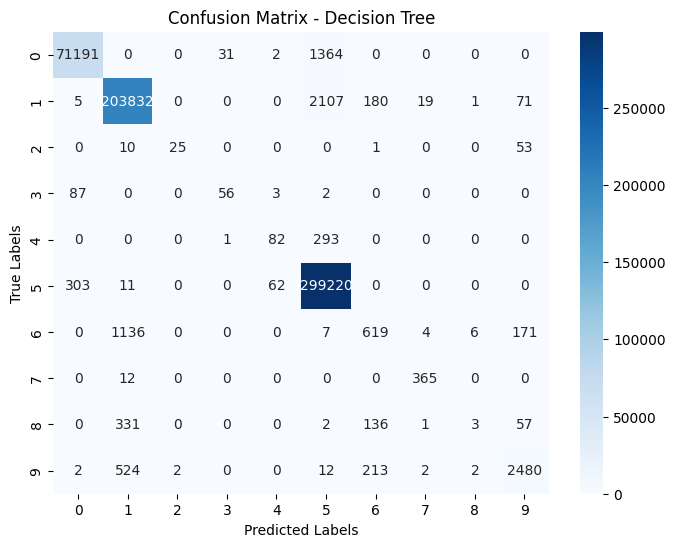

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Define the DNN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Print evaluation metrics
print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")

Epoch 1/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.1151 - accuracy: 0.9678 - val_loss: 0.0685 - val_accuracy: 0.9815
Epoch 2/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0725 - accuracy: 0.9801 - val_loss: 0.0628 - val_accuracy: 0.9826
Epoch 3/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.0665 - accuracy: 0.9813 - val_loss: 0.0556 - val_accuracy: 0.9840
Epoch 4/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.0676 - val_accuracy: 0.9818
Epoch 5/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.0624 - accuracy: 0.9822 - val_loss: 0.0533 - val_accuracy: 0.9848
Epoch 6/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0614 - accuracy: 0.9825 - val_loss: 0.0552 - val_accuracy: 0.9840
Epoch 7/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0612 - accuracy: 0.9826 - val_loss: 0

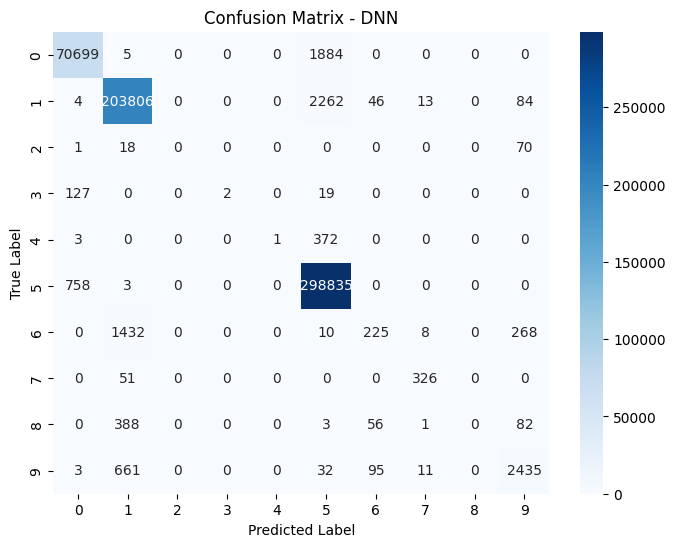

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

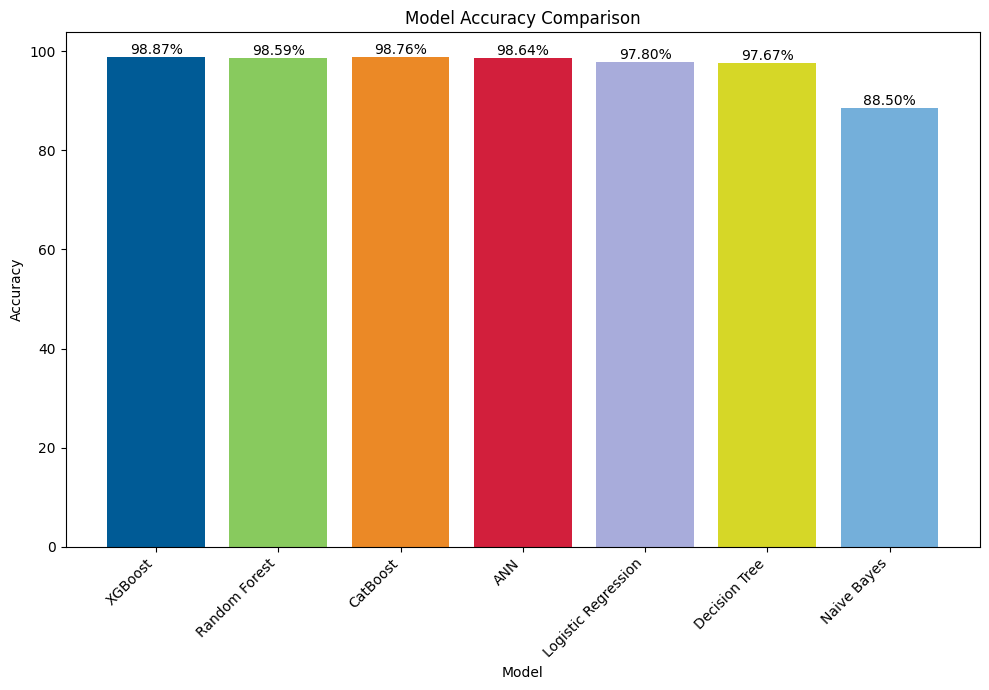

In [ ]:
import matplotlib.pyplot as plt

model_names = ['XGBoost', 'Random Forest', 'CatBoost', 'ANN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes' ]
accuracy_scores = [98.87, 98.59, 98.76, 98.64, 97.80, 97.67, 88.50 ]

colors = ['#005b96', '#88ca5e', '#eb8926', '#d21f3c', '#a8acdb', '#d6d727', '#74afda']

plt.figure(figsize=(10, 7))
bars = plt.bar(model_names, accuracy_scores, color=colors)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## XAI

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.5 MB/s eta 0:00:00


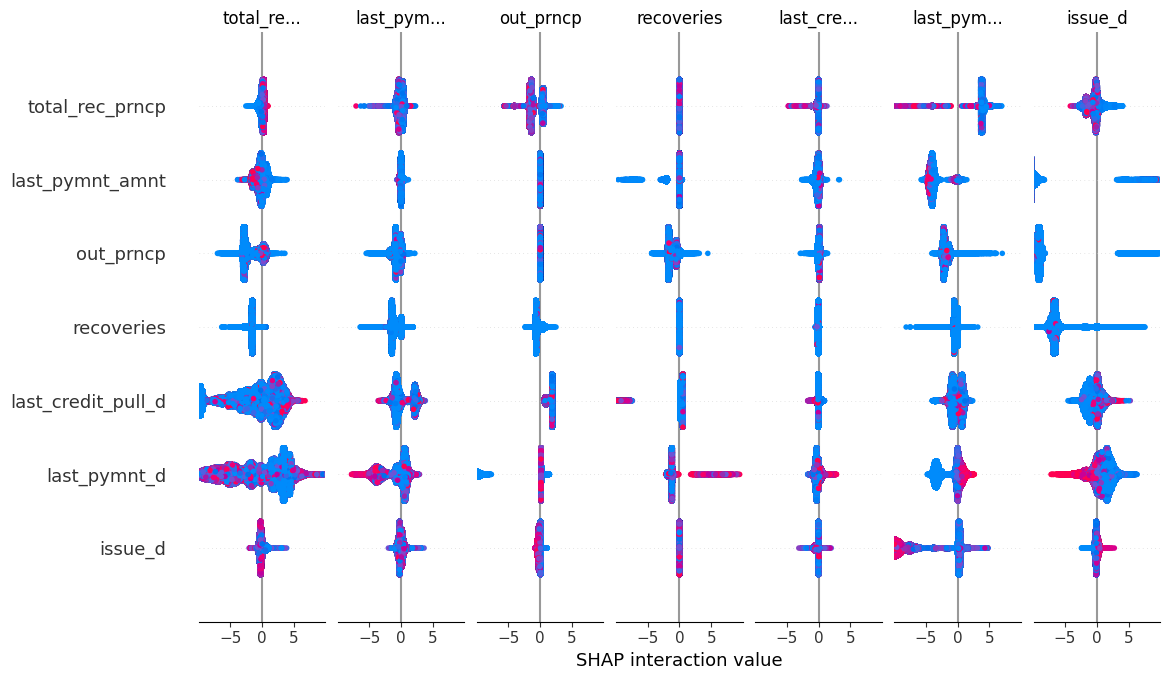

In [ ]:
import shap

explainer_xgb = shap.TreeExplainer(xgb_model)

shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test, max_display=None)


In [ ]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

In [ ]:
from interpret import show
from interpret.blackbox import MorrisSensitivity
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from interpret import show
from interpret.blackbox import MorrisSensitivity

# Determine the class with the highest frequency
unique_classes, class_counts = np.unique(y, return_counts=True)
highest_class = unique_classes[np.argmax(class_counts)]

# Create a binary target variable where the highest class is mapped to 1 and all other classes are mapped to 0
y = np.where(y == highest_class, 1, 0)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model on the binary classification data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Apply Morris Sensitivity explanation on the binary classification problem
msa = MorrisSensitivity(xgb_model, X_test)

# Show the global explanation
show(msa.explain_global())

**Permutation Feature Importance**

Feature Importance (Permutation):
Feature: open_rv_12m, Importance: -0.0000
Feature: open_acc_6m, Importance: -0.0000
Feature: il_util, Importance: -0.0000
Feature: open_rv_24m, Importance: -0.0000
Feature: mths_since_rcnt_il, Importance: -0.0000
Feature: last_fico_range_low, Importance: 0.0000
Feature: open_il_12m, Importance: 0.0000
Feature: inq_fi, Importance: 0.0000
Feature: open_act_il, Importance: 0.0000
Feature: open_il_24m, Importance: 0.0000
Feature: total_bal_il, Importance: 0.0000
Feature: total_cu_tl, Importance: 0.0000
Feature: collection_recovery_fee, Importance: 0.0000
Feature: home_ownership, Importance: 0.0000
Feature: verification_status, Importance: 0.0001
Feature: inq_last_12m, Importance: 0.0001
Feature: max_bal_bc, Importance: 0.0001
Feature: all_util, Importance: 0.0002
Feature: last_credit_pull_d, Importance: 0.0011
Feature: last_fico_range_high, Importance: 0.0060
Feature: out_prncp_inv, Importance: 0.0160
Feature: total_pymnt_inv, Importance: 0.0170
Feature: l

<ipython-input-13-f3964cc4e896>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')


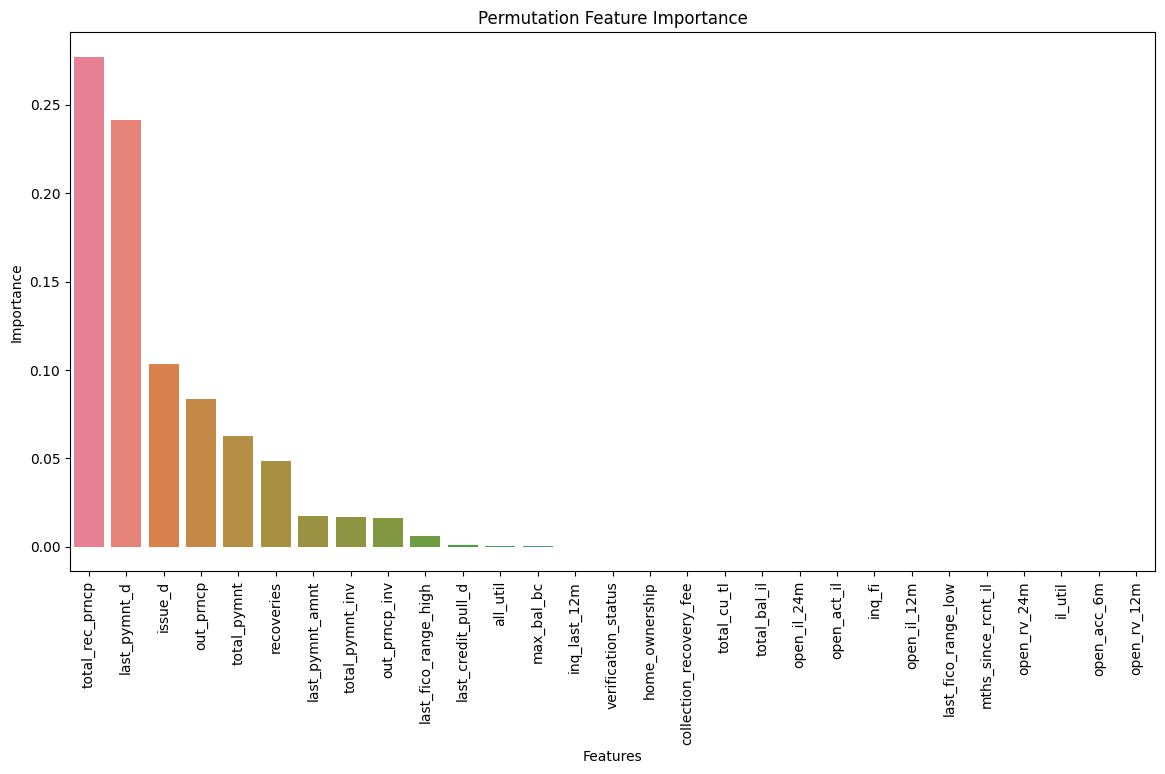

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns


xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importance and sort them
sorted_idx = result.importances_mean.argsort()
feature_importance = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})

# Print all features with their importance
print("Feature Importance (Permutation):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")

# Sort the features based on their importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=90)
plt.show()